In [0]:
'''

This is a very simple GAN implementation. While the code will run and give you results we want you to make some changes. 

'''

In [0]:
'''
Exercise 0 - Enable GPU # This is critical.
'''

In [0]:
import torch
import torch.optim as opt
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mb_size = 64

transform = transforms.ToTensor()

trainData = torchvision.datasets.MNIST('./data/', download=True, transform=transform, train=True)

trainLoader = torch.utils.data.DataLoader(trainData, shuffle=True, batch_size=mb_size)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [0]:
dataIter = iter(trainLoader)

imgs, labels = dataIter.next()

In [4]:
imgs.shape

torch.Size([64, 1, 28, 28])

In [0]:
def imshow(imgs):
    imgs = torchvision.utils.make_grid(imgs)
    npimgs = imgs.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimgs, (1,2,0)), cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()

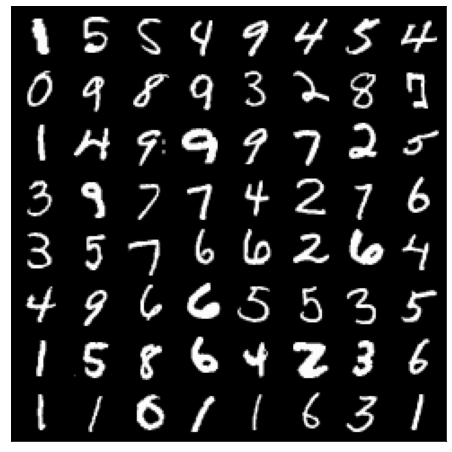

In [6]:
imshow(imgs)

In [0]:
'''
Exercise 1 - Redesign the Generator to have Convolutional, Max Pooling and Feedforward layers i.e. make it CNN like
'''

class Gen(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )
          
    def forward(self, input):
        return self.model(input)

In [0]:
G = Gen().to(device)

In [0]:
'''
Exercise 2 - Redesign the Discriminator to have Convolutional, Max Pooling and Feedforward layers i.e. make it CNN like
'''

class Dis(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(X_dim, H_dim),
            nn.ReLU(),
            nn.Linear(H_dim, 1),
            nn.Sigmoid()
        )
        
    def forward(self, input):
        return self.model(input)

In [0]:
D = Dis().to(device)

In [14]:
print(G)
print(D)

Gen(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)
Dis(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [0]:

'''
Exercise 3 - Play around with this learning rate parameter
'''

lr = 1e-3

g_opt = opt.Adam(G.parameters(), lr=lr)
d_opt = opt.Adam(D.parameters(), lr=lr)

Epoch:0,   G_loss:4.475534564269377,    D_loss:0.14914659517846984


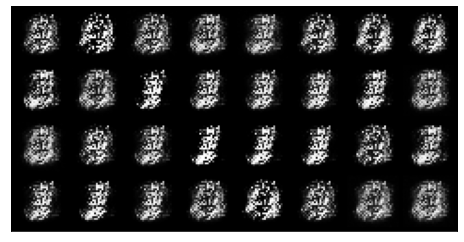

Epoch:1,   G_loss:3.758136057650357,    D_loss:0.16630701454225252


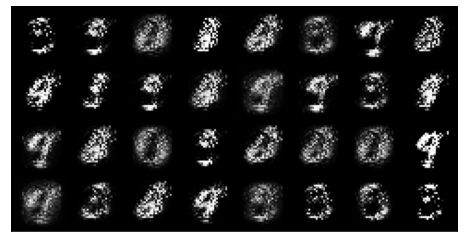

Epoch:2,   G_loss:4.150372506967232,    D_loss:0.19485437465327254


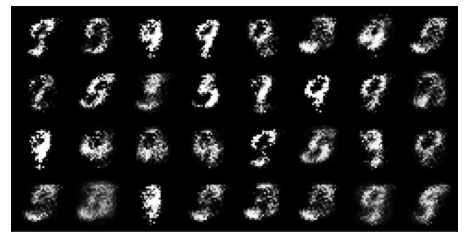

Epoch:3,   G_loss:3.967444707844049,    D_loss:0.34230414214831933


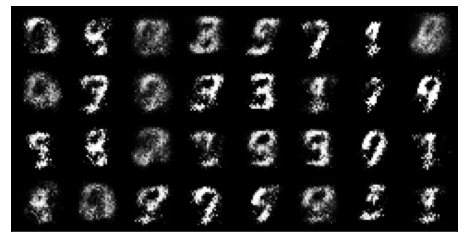

Epoch:4,   G_loss:3.436180833179051,    D_loss:0.4582077526429823


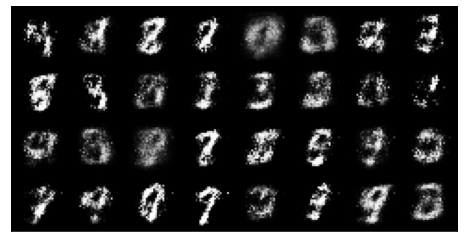

Epoch:5,   G_loss:3.1167904962100454,    D_loss:0.6301420226311887


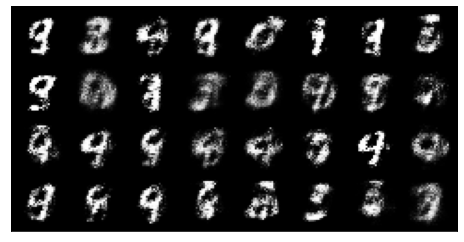

Epoch:6,   G_loss:2.667294109808102,    D_loss:0.7627014954969573


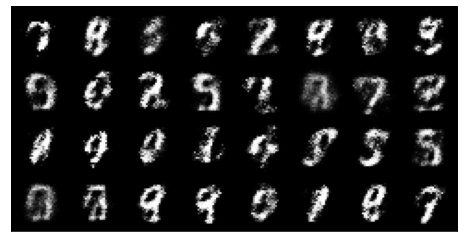

Epoch:7,   G_loss:2.3221514751153713,    D_loss:0.8718522514488651


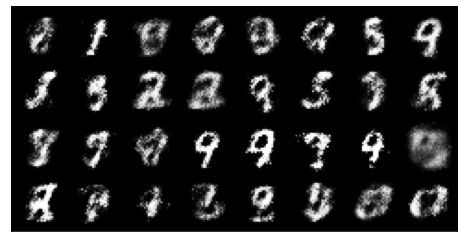

Epoch:8,   G_loss:2.338753485603373,    D_loss:0.9438797839160668


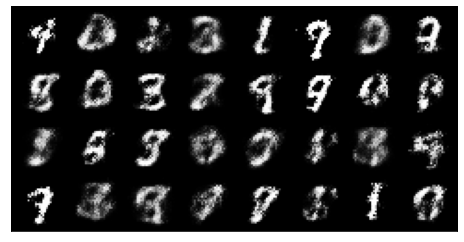

Epoch:9,   G_loss:2.120751599004782,    D_loss:0.9600464364231777


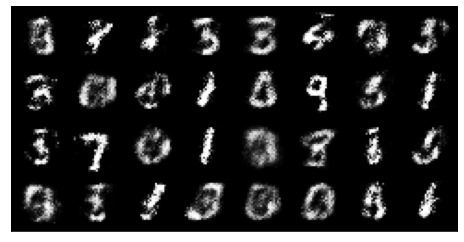

Epoch:10,   G_loss:2.1306547237865963,    D_loss:0.9590390202587348


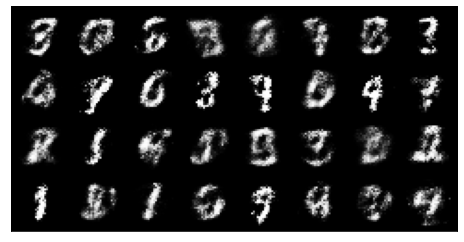

Epoch:11,   G_loss:2.068808635796057,    D_loss:0.9263259811060769


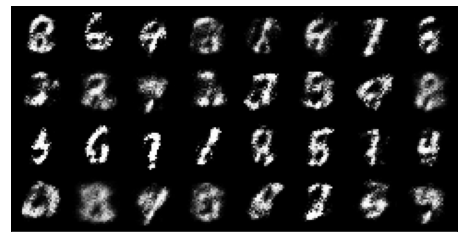

Epoch:12,   G_loss:2.05430054753574,    D_loss:0.9171812025659374


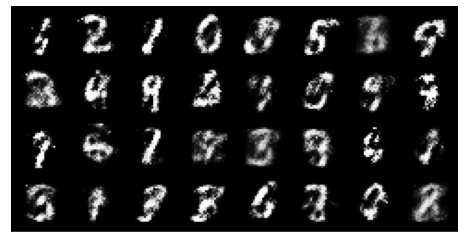

Epoch:13,   G_loss:1.9851209634402667,    D_loss:0.9092957367902117


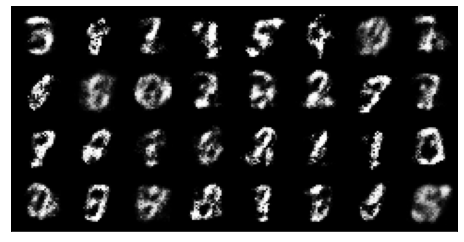

Epoch:14,   G_loss:1.8962035411710678,    D_loss:0.9282475730249369


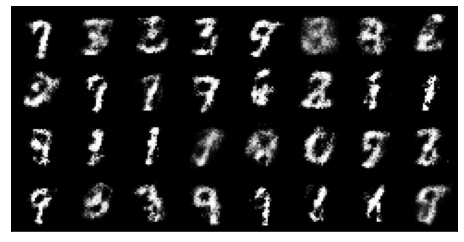

Epoch:15,   G_loss:1.8573362776465507,    D_loss:0.9933340633983043


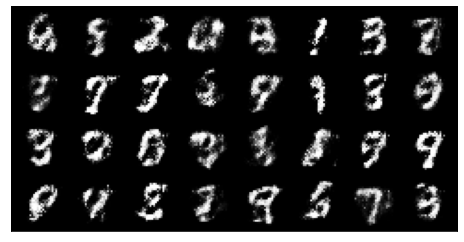

Epoch:16,   G_loss:1.7821552145964048,    D_loss:0.9765053958908073


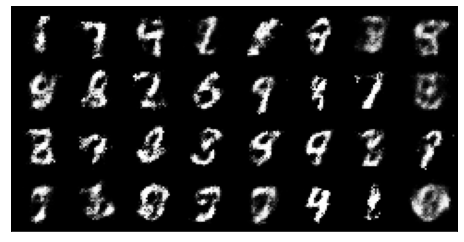

Epoch:17,   G_loss:1.7211767416010533,    D_loss:1.0160222826227705


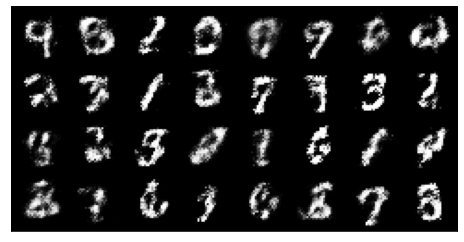

Epoch:18,   G_loss:1.6890149783732287,    D_loss:0.9623070331270507


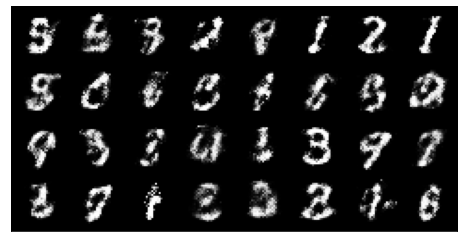

Epoch:19,   G_loss:1.6416354664226076,    D_loss:0.9710584849691086


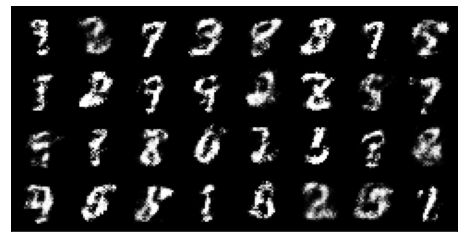

In [16]:
'''
Exercise 4 - Explain the following training code in detail. Especially why do we have two losses, one for discriminator and other for generator.
Once you have trained your network long enough and provided your architecture is correct, you will see (in theory) your Discriminator loss stabilize to 
-log(1/2) ~ 0.7. In practice, it might not. Why might such discrepancy happen? Also explain the idea behind -log(1/2).
'''


for epoch in range(20):
    G_loss_run = 0.0
    D_loss_run = 0.0
    for i, data in enumerate(trainLoader):
        X, _ = data
        X = X.view(X.size(0), -1).to(device)
        mb_size = X.size(0)
        
        one_labels = torch.ones(mb_size, 1).to(device)
        zero_labels = torch.zeros(mb_size, 1).to(device)
        
        z = torch.randn(mb_size, Z_dim).to(device)
        
        D_real = D(X)
        D_fake = D(G(z))
        
        D_real_loss = F.binary_cross_entropy(D_real, one_labels)
        D_fake_loss = F.binary_cross_entropy(D_fake, zero_labels)
        D_loss = D_real_loss + D_fake_loss
        
        d_opt.zero_grad()
        D_loss.backward()
        d_opt.step()
        
        z = torch.randn(mb_size, Z_dim).to(device)
        D_fake = D(G(z))
        G_loss = F.binary_cross_entropy(D_fake, one_labels)
        
        g_opt.zero_grad()
        G_loss.backward()
        g_opt.step()
        
        G_loss_run += G_loss.item()
        D_loss_run += D_loss.item()
        
    print('Epoch:{},   G_loss:{},    D_loss:{}'.format(epoch, G_loss_run/(i+1), D_loss_run/(i+1)))
    
    samples = G(z).detach()
    samples = samples.view(samples.size(0), 1, 28, 28).cpu()
    imshow(samples)


In [0]:
'''
Exercise - 5 : If you notice weird things while training the GAN? please report them and try to explain the weird behavior.
'''